In [2]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 2.0 MB/s eta 0:00:19
   ---------------------------------------- 0.2/38.8 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.5/38.8 MB 4.6 MB/s eta 0:00:09
    --------------------------------------- 0.8/38.8 MB 5.3 MB/s eta 0:00:08
   - -------------------------------------- 1.2/38.8 MB 5.6 MB/s eta 0:00:07
   - -------------------------------------- 1.3/38.8 MB 5.2 MB/s eta 0:00:08
   - -------------------------------------- 1.5/38.8 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.7/38.8 MB 4.9 MB/s eta 0:00:08
   - -------------------------------------- 1.9/38.8 MB 4.7 MB/s eta 0:00:08
   -- ---------

In [4]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from collections import Counter


In [5]:
keyword = input("Search: ")
PATH = "data/"

for category in os.listdir(PATH):
    if category == keyword:
        path = os.path.join(PATH, category)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path, image))
            img = cv2.resize(img, (200, 200))
            cv2.imshow(category, img)
            cv2.waitKey(1000)
cv2.destroyAllWindows()


Search: dress


In [6]:
dataset = pd.read_csv('person.csv')

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, [0]].values
name = dataset['Item_names'].tolist()


In [7]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_


In [8]:
gg = Counter(labels)

In [9]:
def find_max():
    max_count = gg[0]
    max_label = 0
    for label, count in gg.items():
        if count > max_count:
            max_count = count
            max_label = label
    return max_label

In [10]:
Y = y.tolist()
L = labels.tolist()

In [11]:
max_label = find_max()

In [12]:
suggest = []
for i in range(len(labels)):
    if max_label == L[i]:
        suggest.append(Y[i])

In [13]:
def stripp(rr):
    new = []
    for i in range(len(suggest)):
        p = str(rr[i]).replace('[', '').replace(']', '')
        new.append(int(p))
    return new

In [14]:
new_Y = stripp(Y)
new_name = []
for i in range(len(suggest)):
    p = str(name[i]).replace('[', '').replace(']', '')
    new_name.append(p)


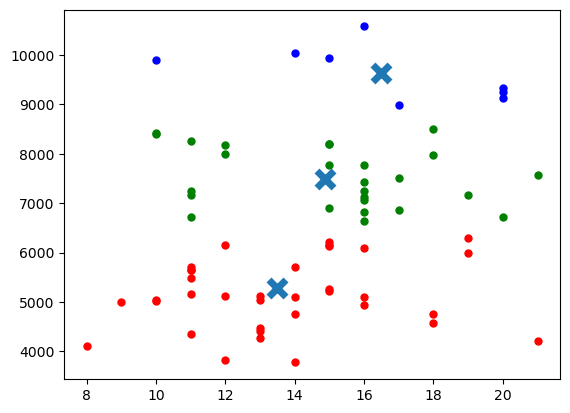

In [15]:
n_clusters_ = len(np.unique(labels))

colors = 10 * ['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="x", s=150, linewidths=5, zorder=10)


In [16]:
item_name = dict(zip(new_Y, new_name))


In [17]:
print("Recommendations:")
for i in range(10):
    print("Item ID- {}   Item name- {}".format(new_Y[i], new_name[i]))


Recommendations:
Item ID- 23   Item name- necklace
Item ID- 7   Item name- skirt
Item ID- 45   Item name- cars
Item ID- 59   Item name- onions
Item ID- 69   Item name- jacket
Item ID- 20   Item name- hat
Item ID- 57   Item name- sugar
Item ID- 52   Item name- cards
Item ID- 55   Item name- bacon
Item ID- 25   Item name- shampoo


In [18]:
plt.show()

In [19]:
import pickle
from sklearn.cluster import MeanShift
from collections import Counter
import pandas as pd

# Load dataset
dataset = pd.read_csv('person.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, [0]].values
name = dataset['Item_names'].tolist()

# Perform MeanShift clustering
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Save the trained model, labels, and cluster centers
with open('meanshift_model.pkl', 'wb') as f:
    pickle.dump((ms, labels, cluster_centers, y, name), f)
